# Build a portfolio using Markowitz's modern portfolio theory

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import random
import math
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

## Get the data

In [2]:
symbols = ['AAPL', 'MSFT', 'META', 'NVDA', 'GOOGL', 'GOOG', 'ADBE', 'CSCO', 'AMZN', 'INTC',
           'JNJ', 'MRK', 'ABT', 'AMGN', 'GILD', 'BMY', 'MDT', 'ABT', 'TMO', 'CI', 'JPM',
           'BAC', 'WFC', 'GS', 'MS', 'C', 'AXP', 'V', 'MA', 'SCHW', 'XOM', 'CVX', 'SLB',
           'COP', 'PSX', 'VLO', 'KMI', 'OXY', 'EOG', 'HAL']

# Fetch data for the selected stocks
data = yf.download(symbols, period="1d", start="2022-01-01", end="2022-12-31")

[*********************100%%**********************]  39 of 39 completed


In [3]:
data['Adj Close'].head()

,AAPL,ABT,ADBE,AMGN,AMZN,AXP,BAC,BMY,C,CI,...,NVDA,OXY,PSX,SCHW,SLB,TMO,V,VLO,WFC,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,180.190964,134.805542,564.369995,214.057724,170.404495,164.308426,44.115795,58.538750,58.736122,228.335403,...,300.846344,30.621193,70.557884,83.782761,30.939665,642.654236,218.500305,72.672562,48.490364,59.638229
2022-01-04,177.904083,131.635162,554.000000,215.143631,167.522003,169.583145,45.844887,58.775253,59.192238,227.457932,...,292.546417,32.908421,73.194267,87.885925,32.441784,615.828857,219.516693,73.963226,50.421192,61.881466
2022-01-05,173.171844,131.043747,514.429993,212.594086,164.356995,167.776093,45.071095,58.803631,58.503418,230.597290,...,275.706757,31.360596,72.961365,87.250908,32.441784,616.347046,217.089264,73.671165,49.981495,62.651119
2022-01-06,170.281021,131.024353,514.119995,212.622406,163.253998,169.313507,45.978630,58.670029,60.420956,221.842148,...,281.439819,32.297176,74.973587,88.647957,33.212345,618.220398,216.842545,75.517670,51.262348,64.124695
2022-01-07,170.449310,131.431549,510.700012,214.624298,162.554001,170.762802,46.981701,59.958332,61.230782,227.340927,...,272.141083,32.740822,76.352325,89.624886,34.168240,604.937256,214.089493,76.309021,52.352016,64.650307


## Plot Growth of Investments

<AxesSubplot:xlabel='Date'>

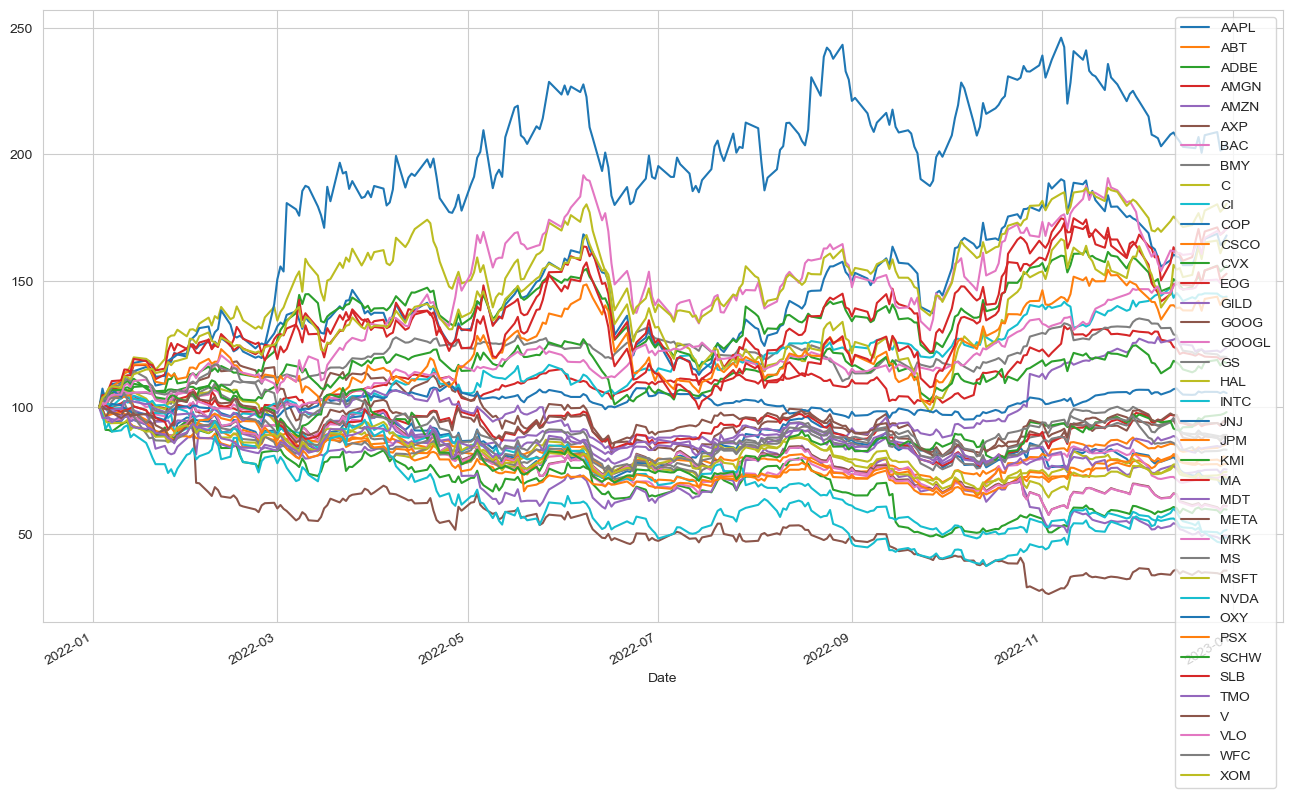

In [4]:
((data['Adj Close'] / data['Adj Close'].iloc[0] * 100).plot(figsize=(16, 9)))

### Mean Return

In [5]:
returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
mean_ret = returns.mean() * 251 # 252 average trading days per year
mean_ret

AAPL    -0.332604
ABT     -0.220429
ADBE    -0.519091
AMGN     0.179011
AMZN    -0.710188
AXP     -0.117272
BAC     -0.310630
BMY      0.182086
C       -0.294722
CI       0.364818
COP      0.520816
CSCO    -0.252097
CVX      0.445978
EOG      0.426141
GILD     0.213383
GOOG    -0.493616
GOOGL   -0.498715
GS      -0.115302
HAL      0.510712
INTC    -0.663467
JNJ      0.055509
JPM     -0.156706
KMI      0.162787
MA      -0.059034
MDT     -0.281973
META    -1.038459
MRK      0.400198
MS      -0.130116
MSFT    -0.325466
NVDA    -0.725197
OXY      0.718242
PSX      0.359823
SCHW    -0.018547
SLB      0.538898
TMO     -0.156370
V       -0.056412
VLO      0.534815
WFC     -0.183417
XOM      0.592800
dtype: float64

### Correlation

In [6]:
returns.cov() * 251

,AAPL,ABT,ADBE,AMGN,AMZN,AXP,BAC,BMY,C,CI,...,NVDA,OXY,PSX,SCHW,SLB,TMO,V,VLO,WFC,XOM
AAPL,0.126308,0.059081,0.114312,0.024739,0.124256,0.082675,0.064515,0.019786,0.067013,0.039853,...,0.170953,0.050548,0.039977,0.059723,0.039230,0.072559,0.076472,0.034946,0.063142,0.033857
ABT,0.059081,0.071279,0.069703,0.024969,0.069181,0.056809,0.049692,0.020336,0.050279,0.031780,...,0.092506,0.022116,0.018008,0.043622,0.018018,0.062456,0.051408,0.010923,0.050185,0.016231
ADBE,0.114312,0.069703,0.209144,0.025995,0.147088,0.082388,0.061619,0.008990,0.067991,0.031609,...,0.205016,0.051900,0.047789,0.071390,0.035352,0.089036,0.086363,0.038498,0.063234,0.032156
AMGN,0.024739,0.024969,0.025995,0.046611,0.020755,0.023089,0.018637,0.017042,0.019464,0.026607,...,0.025417,0.004696,0.006610,0.019324,0.009490,0.014638,0.020292,0.005138,0.022804,0.006234
AMZN,0.124256,0.069181,0.147088,0.020755,0.250691,0.104110,0.088413,0.014752,0.084268,0.039445,...,0.224502,0.068279,0.051547,0.082611,0.050709,0.089276,0.085615,0.050294,0.084979,0.042901
AXP,0.082675,0.056809,0.082388,0.023089,0.104110,0.126359,0.084447,0.018736,0.078082,0.035669,...,0.145362,0.054882,0.050041,0.075419,0.053614,0.059715,0.074721,0.051614,0.085575,0.032527
BAC,0.064515,0.049692,0.061619,0.018637,0.088413,0.084447,0.103199,0.017323,0.086573,0.034506,...,0.111649,0.048341,0.051538,0.071601,0.051807,0.050016,0.058411,0.049172,0.093293,0.034135
BMY,0.019786,0.020336,0.008990,0.017042,0.014752,0.018736,0.017323,0.038922,0.018132,0.025147,...,0.018738,0.013368,0.010962,0.015831,0.011153,0.018710,0.016194,0.013481,0.018407,0.011572
C,0.067013,0.050279,0.067991,0.019464,0.084268,0.078082,0.086573,0.018132,0.107436,0.034694,...,0.114778,0.055706,0.059292,0.061587,0.062972,0.051853,0.057207,0.051551,0.083471,0.043332
CI,0.039853,0.031780,0.031609,0.026607,0.039445,0.035669,0.034506,0.025147,0.034694,0.069455,...,0.049863,0.035600,0.023418,0.038728,0.028766,0.031326,0.032639,0.026215,0.035323,0.022133


## Key Functions

In [7]:
total_portfolio_stock = []

In [8]:
# Function to extract the close prices for the symbols and call the plot_portfolio function.
def get_data_and_plot_ef(data, symbols, num_results):
    # Extract the 'Close' prices of specified symbols from the data
    close = data['Close'][symbols]
    
    # Call the 'plot_portfolio' function to generate portfolio data and plot it
    portfolio_data, max_sharpe_index = plot_portfolio(close, num_results)
    
    # Extract the portfolio weights for the portfolio with the highest Sharpe ratio
    max_sharpe_weights = portfolio_data.loc[max_sharpe_index, 'weights']
    
    # Create a formatted string with stock symbols and their weights
    result_string = '\n'.join([f'{symbol} : {weight:.2f}' for symbol, weight in zip(symbols, max_sharpe_weights)])
    
    # Print the formatted result
    print("The Efficient portfolio sharpe stocks and their weights:\n" + result_string)
    
    total_portfolio_stock.extend([f'{symbol} : {weight:.2f}' for symbol, weight in zip(symbols, max_sharpe_weights)])
    
    return portfolio_data, max_sharpe_index

In [9]:
# Function to plot the efficient frontier and highlight the portfolio with the highest Sharpe ratio.
def plot_portfolio(close, num_data):
    # Calculate the covariance matrix of the stock returns
    cov = close.cov()
    
    # Calculate the daily returns
    close_diff = close.diff()
    returns = close_diff.sum() / len(close_diff)
    
    # Convert the covariance matrix to a NumPy array
    cov_mat = np.array(cov)
    
    # Generate multiple portfolios and store their parameters
    portfolio_data = [calculate_params(returns, cov_mat) for i in range(num_data)]
    
    # Create a DataFrame to store portfolio data
    portfolio_df = pd.DataFrame(portfolio_data, columns=['portfolio_return', 'portfolio_cov', 'vol', 'sharpe', 'weights'])
    
    # Plot size
    plt.subplots(figsize=(14, 8))
    
    # Find the portfolio with the maximum Sharpe ratio (efficient portfolio)
    max_sharpe_index = portfolio_df['sharpe'].idxmax()
    efficient_port = portfolio_df.loc[max_sharpe_index]
    
    x = efficient_port['vol']  # Volatility of the efficient portfolio
    y = efficient_port['portfolio_return']  # Return of the efficient portfolio
    ep_sharpe = round(efficient_port['sharpe'], 4)  # Sharpe ratio of the efficient portfolio

    # Add an annotation to the plot to display the Sharpe ratio of the efficient portfolio
    plt.annotate(f'Efficient Portfolio  Sharpe: {ep_sharpe}',
                 (x, y), xycoords='data', size=15,
                 xytext=(0.8, 0.95), textcoords='axes fraction',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 horizontalalignment='right', verticalalignment='top',
                 )
    
    # Add text to the plot for the Capital Market Line
    plt.text(.9 * x / 2, y / 2, f' Capital Market Line ', size=10)
    
    # Create a scatter plot of portfolio return vs. portfolio volatility
    # Color the points based on the Sharpe ratio
    plt.scatter(portfolio_df['vol'], portfolio_df['portfolio_return'], c=portfolio_df['sharpe'], cmap='viridis')
    
    # Plot the Capital Market Line
    plt.plot([0, x], [0, y])
    
    # Set labels for the x and y axes
    plt.xlabel("Portfolio Return", size=18)
    plt.ylabel("Portfolio Volatility", size=18)
    
    # Add text to display the efficient portfolio weights
    # plt.text(0, portfolio_df['portfolio_return'].min(), 'EP Weights \n' + '\n'.join([f'{symbol} : {weight:.2f}' for symbol, weight in zip(symbols, efficient_port['weights'])]), size=10)
    
    # Add text to display efficient portfolio parameters
    plt.text(0, 0.8 * portfolio_df['portfolio_return'].max(), f'EP params: \nreturn: {round(y, 4)} \nvol {x} \nsharpe  {ep_sharpe}', size=10)

    # Show the plot
    plt.show()
    
    # print("The Efficient portfolio sharpe stocks and their weights:")
    # for symbol, weight in zip(symbols, efficient_port['weights']):
    #     print(f"{symbol} : {weight}")
    
    # Return the DataFrame containing portfolio data and the index of the portfolio with the highest Sharpe ratio
    return portfolio_df, max_sharpe_index

In [10]:
# Function to generate a random portfolio with given asset returns and covariance matrix,
# calculates its return, covariance, volatility, and Sharpe ratio.
def calculate_params(returns, cov_mat):
    # Generate random portfolio weights
    a = np.array(random.sample(range(1, 100), cov_mat.shape[0]))
    weights = a / sum(a)
    
    # Calculate portfolio return, covariance, volatility, and Sharpe ratio
    portfolio_return = weights.dot(returns)
    portfolio_cov = weights.dot(cov_mat).dot(weights.T)
    vol = math.sqrt(portfolio_cov)
    sharpe = portfolio_return / vol
    
    # Return a tuple of portfolio parameters
    return (portfolio_return, portfolio_cov, vol, sharpe, weights)

## Portfolio 1 - Tech

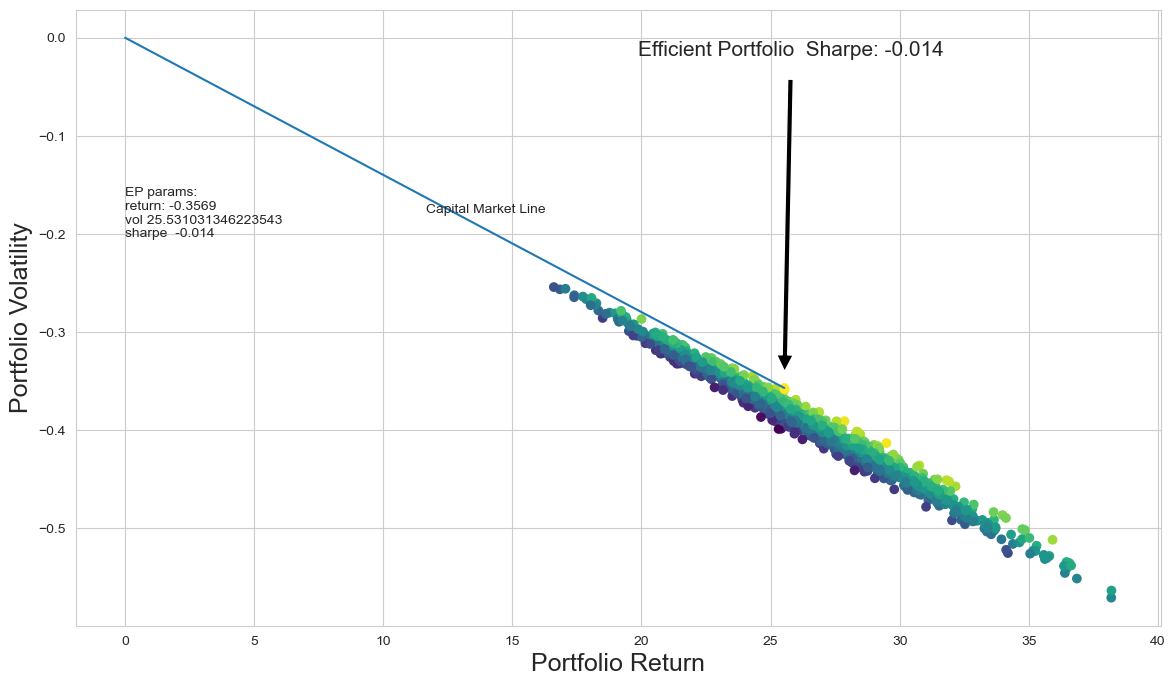

The Efficient portfolio sharpe stocks and their weights:
AAPL : 0.00
MSFT : 0.14
META : 0.01
NVDA : 0.13
GOOGL : 0.04
GOOG : 0.12
ADBE : 0.16
CSCO : 0.25
AMZN : 0.01
INTC : 0.14


In [11]:
symbols = ['AAPL', 'MSFT', 'META', 'NVDA', 'GOOGL', 'GOOG', 'ADBE', 'CSCO', 'AMZN', 'INTC']

num_results = 1000
portfolio_df = get_data_and_plot_ef(data, symbols, num_results)

## Portfolio 2 - Healthcare

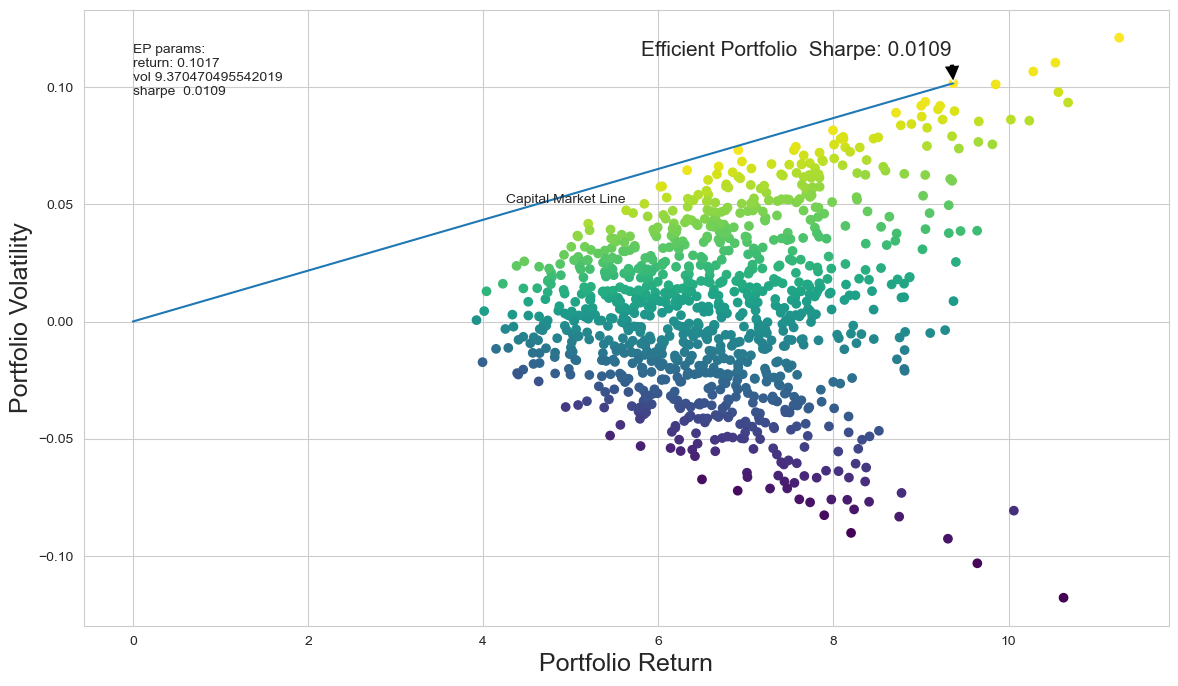

The Efficient portfolio sharpe stocks and their weights:
JNJ : 0.22
MRK : 0.11
ABT : 0.13
AMGN : 0.02
GILD : 0.17
BMY : 0.04
MDT : 0.04
ABT : 0.01
TMO : 0.01
CI : 0.24


In [12]:
symbols = ['JNJ', 'MRK', 'ABT', 'AMGN', 'GILD', 'BMY', 'MDT', 'ABT', 'TMO', 'CI']

num_results = 1000
portfolio_df = get_data_and_plot_ef(data, symbols, num_results)

## Portfolio 3 - Finance

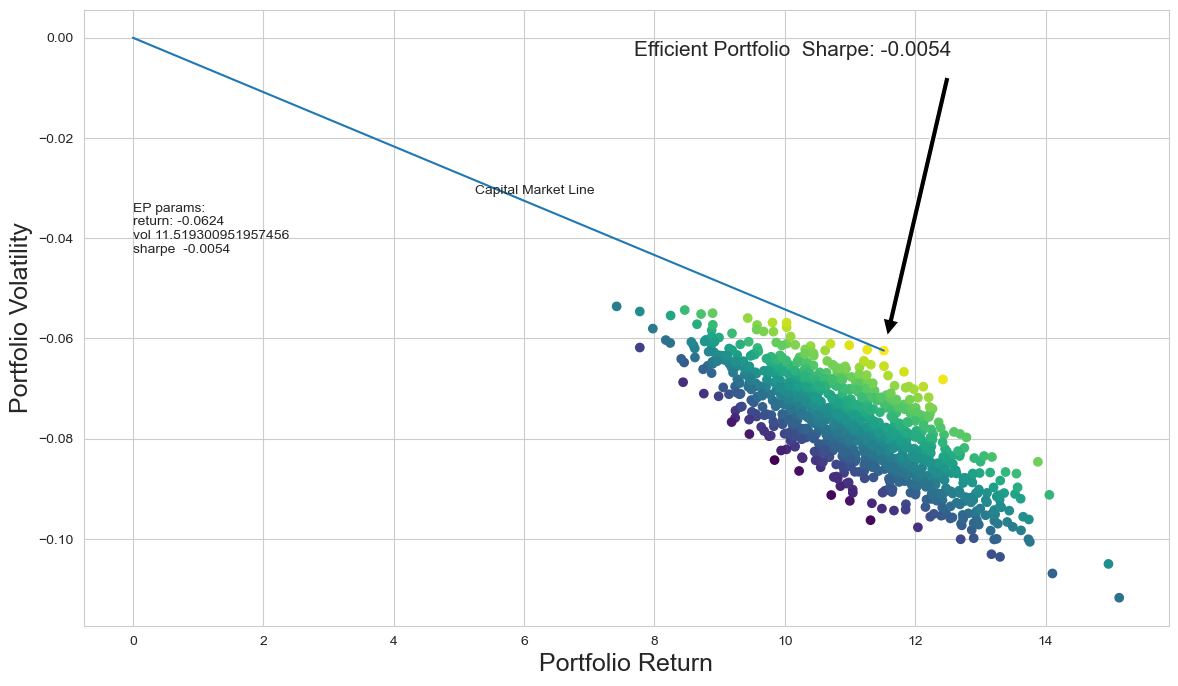

The Efficient portfolio sharpe stocks and their weights:
JPM : 0.03
BAC : 0.11
WFC : 0.07
GS : 0.01
MS : 0.08
C : 0.01
AXP : 0.20
V : 0.17
MA : 0.17
SCHW : 0.13


In [13]:
symbols = ['JPM', 'BAC', 'WFC', 'GS', 'MS', 'C', 'AXP', 'V', 'MA', 'SCHW']

num_results = 1000
portfolio_df = get_data_and_plot_ef(data, symbols, num_results)

## Portfolio 4 - Energy

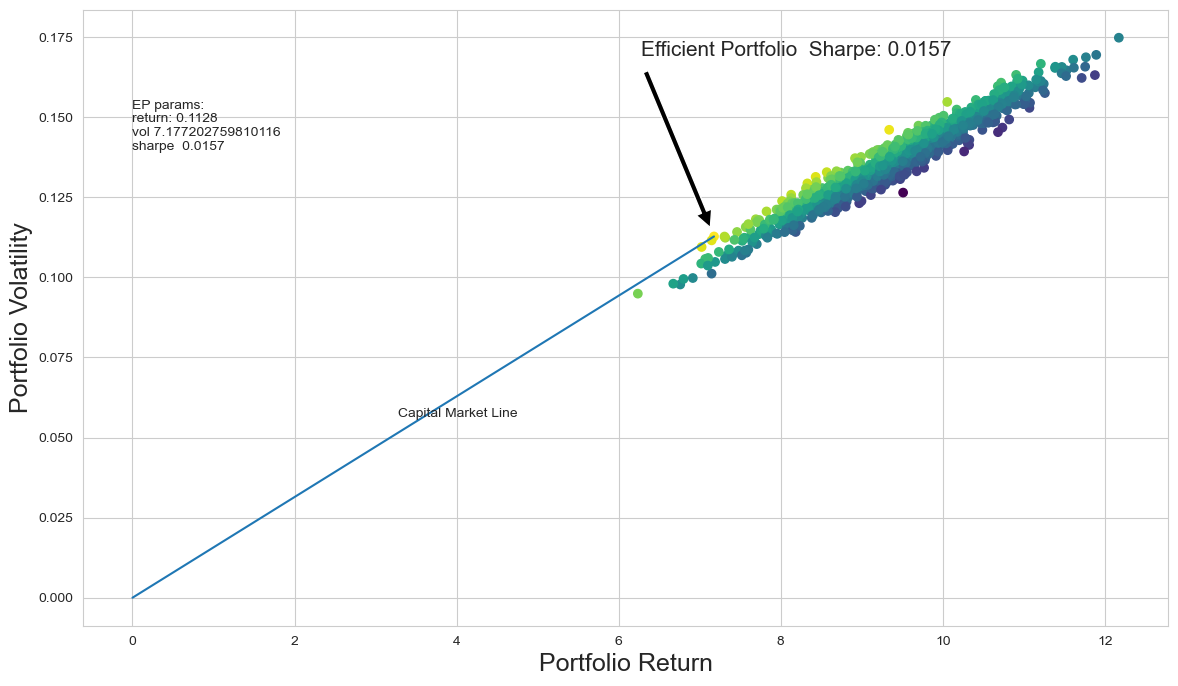

The Efficient portfolio sharpe stocks and their weights:
XOM : 0.21
CVX : 0.10
SLB : 0.09
COP : 0.02
PSX : 0.05
VLO : 0.05
KMI : 0.23
OXY : 0.03
EOG : 0.04
HAL : 0.18


In [14]:
symbols = ['XOM', 'CVX', 'SLB', 'COP', 'PSX', 'VLO', 'KMI', 'OXY', 'EOG', 'HAL']

num_results = 1000
portfolio_df = get_data_and_plot_ef(data, symbols, num_results)

## Final Portfolio

In [15]:
# Total portfolio stock list
# total_portfolio_stock

In [16]:
# Get stock where weight is greater than 0.1
filtered_elements = [item for item in total_portfolio_stock if float(item.split(':')[1].strip()) > 0.1]

for item in filtered_elements:
    print(item)

MSFT : 0.14
NVDA : 0.13
GOOG : 0.12
ADBE : 0.16
CSCO : 0.25
INTC : 0.14
JNJ : 0.22
MRK : 0.11
ABT : 0.13
GILD : 0.17
CI : 0.24
BAC : 0.11
AXP : 0.20
V : 0.17
MA : 0.17
SCHW : 0.13
XOM : 0.21
KMI : 0.23
HAL : 0.18
